<a href="https://colab.research.google.com/github/TanThinNguyen/aivietnam-course/blob/master/Tuan9/Tuan9_Bai4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

CNN for MNIST

In [ ]:
# data preparation
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize
x_train = x_train/255.0
x_test = x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train # shape (60000, 28, 28, 1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
x_train[0]  # shape (28, 28, 1)

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
y_train # shape (60000,)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
# model architecture
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation="relu", input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=84, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
# training
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2223 - accuracy: 0.9325 - val_loss: 0.0865 - val_accuracy: 0.9749
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0743 - accuracy: 0.9768 - val_loss: 0.0588 - val_accuracy: 0.9822
Epoch 3/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0559 - val_accuracy: 0.9839
Epoch 4/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9860 - val_loss: 0.0540 - val_accuracy: 0.9852
Epoch 5/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0483 - val_accuracy: 0.9862
Epoch 6/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0552 - val_accuracy: 0.9846
Epoch 7/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0245 - accuracy: 0.9918 - val_loss: 0.0456 - val_ac

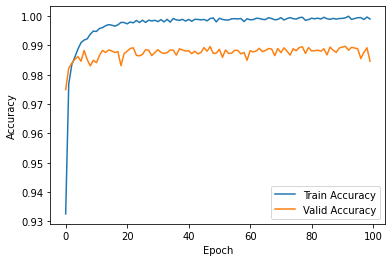

In [ ]:
plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(history.epoch, history.history["accuracy"], label="Train Accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid Accuracy")

plt.legend()
plt.show()

CNN for Cifar-10

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# load data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
# normalize
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
input_shape = (32, 32, 3)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# model architecture
model1 = Sequential()

model1.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=input_shape))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Flatten())
model1.add(Dense(units=120, activation="relu"))
model1.add(Dense(units=84, activation="relu"))
model1.add(Dense(units=10, activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4

In [ ]:
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history1 = model1.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4692 - accuracy: 0.4646 - val_loss: 1.2944 - val_accuracy: 0.5351
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1296 - accuracy: 0.5936 - val_loss: 1.1755 - val_accuracy: 0.5829
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0053 - accuracy: 0.6411 - val_loss: 1.0737 - val_accuracy: 0.6210
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9177 - accuracy: 0.6734 - val_loss: 1.1252 - val_accuracy: 0.6026
Epoch 5/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8511 - accuracy: 0.6937 - val_loss: 1.0832 - val_accuracy: 0.6145
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8001 - accuracy: 0.7143 - val_loss: 1.3616 - val_accuracy: 0.5423
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7562 - accuracy: 0.7311 - val_loss: 0.9983 - val_ac

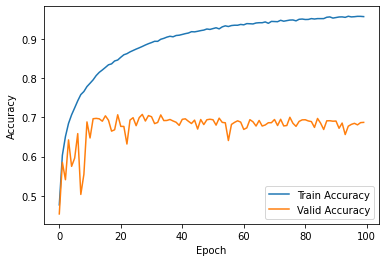

In [ ]:
plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(history1.epoch, history1.history["accuracy"], label="Train Accuracy")
plt.plot(history1.epoch, history1.history["val_accuracy"], label="Valid Accuracy")

plt.legend()
plt.show()